In [11]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import linalg

## Functions

In [29]:
# Rank functions for d = 1 case: here we uniformly sample non-empty activation regions
# by sampling mutually iid step rows uniformly at random
# Sample step row
def sample_step_vector(n):
    """
    Samples a step vector drawn uniformly at random.
    Inputs:
        - n is the row length / number of samples in the training set
    Outputs:
        - a step vector
    """
    pos = np.random.randint(n, size=1)[0]
    row = np.concatenate((np.zeros(pos, dtype = bool), np.ones(n-pos, dtype = bool))) 
    if np.random.randint(2, size=1)[0]:
        row = np.invert(row)
    return row
       
# Sample non-empty activation matrix
def sample_region(m,n,d=1,v=1):
    """
    Samples a non-empty activation pattern and returns its rank.
    For the d=1 case samples activation patterns uniformly at random. 
    Same guarantee does not hold for d>1, here insead we sample Gaussian
    data, weights and biases and check the preactivation.
    
    Inputs:
        - n row length / number of samples in the training set
        - m is the number of neurons (network width)
        - d is the dimension of the data
    Outputs:
        - rank of a randomly sampled activation pattern
    """
    A = np.zeros((m,n), dtype=bool)
    X = v*np.random.randn(d,n)
    if d == 1:
        for r in range(m):
            A[r,:] = sample_step_vector(n)             
    else:
        W = np.random.randn(m,d)      
        b = np.random.randn(m,1)
        P = W@X+b
        A = P>1    
    J = linalg.khatri_rao(A, X)
    NTK = J.T@J
    rank_A = np.linalg.matrix_rank(A)
    eff_NTK = np.trace(NTK)/(linalg.eigh(NTK, eigvals_only=True, subset_by_index=[n-1,n-1])[0])
    
    return rank_A, eff_NTK 

In [30]:
def compute_stats(N, M, T, D, V):
    av_rank_A = np.zeros((len(D), len(V), len(M), len(N)))
    av_eff_NTK = np.zeros((len(D), len(V), len(M), len(N)))
    for l in range(len(D)):
        for s in range(len(V)):
            for i in range(len(M)):
                for j in range(len(N)):
                    print("Computing average rank for d=" + str(D[l]) + ", v=" + str(V[s]) + ", m="+str(M[i]) + ", n=" + str(N[j]))
                    for t in range(T):
                        rank_A, eff_NTK= sample_region(M[i],N[j],D[l],V[s])
                        av_rank_A[l,s,i,j] += rank_A # A does not actually depend on s here, but kept as is for simplicity
                        av_eff_NTK[l,s,i,j] += eff_NTK                   
                    av_rank_A[l,s,i,j] = 100*av_rank_A[l,s,i,j]/(T*N[j])
                    av_eff_NTK[l,s,i,j] = av_eff_NTK[l,s,i,j]/T
                    
    return av_rank_A, av_cond_J, av_eff_NTK

## Experiments

In [31]:
# Define number data points, size of hidden layer, data dimension and number of trials
N = np.arange(25,501,25)
M = np.arange(25,501,25)
D = [1,2,5,10,50]
V = [0.1, 1, 10]
T = 10

In [32]:
av_rank_A, av_cond_J, av_eff_NTK = compute_stats(N, M, T, D, V)

Computing average rank for d=1, v=0.1, m=25, n=25
Computing average rank for d=1, v=0.1, m=25, n=50
Computing average rank for d=1, v=0.1, m=25, n=75
Computing average rank for d=1, v=0.1, m=25, n=100
Computing average rank for d=1, v=0.1, m=25, n=125
Computing average rank for d=1, v=0.1, m=25, n=150
Computing average rank for d=1, v=0.1, m=25, n=175
Computing average rank for d=1, v=0.1, m=25, n=200
Computing average rank for d=1, v=0.1, m=25, n=225
Computing average rank for d=1, v=0.1, m=25, n=250
Computing average rank for d=1, v=0.1, m=25, n=275
Computing average rank for d=1, v=0.1, m=25, n=300
Computing average rank for d=1, v=0.1, m=25, n=325
Computing average rank for d=1, v=0.1, m=25, n=350
Computing average rank for d=1, v=0.1, m=25, n=375
Computing average rank for d=1, v=0.1, m=25, n=400
Computing average rank for d=1, v=0.1, m=25, n=425
Computing average rank for d=1, v=0.1, m=25, n=450
Computing average rank for d=1, v=0.1, m=25, n=475
Computing average rank for d=1, v=

Computing average rank for d=1, v=0.1, m=225, n=25
Computing average rank for d=1, v=0.1, m=225, n=50
Computing average rank for d=1, v=0.1, m=225, n=75
Computing average rank for d=1, v=0.1, m=225, n=100
Computing average rank for d=1, v=0.1, m=225, n=125
Computing average rank for d=1, v=0.1, m=225, n=150
Computing average rank for d=1, v=0.1, m=225, n=175
Computing average rank for d=1, v=0.1, m=225, n=200
Computing average rank for d=1, v=0.1, m=225, n=225
Computing average rank for d=1, v=0.1, m=225, n=250
Computing average rank for d=1, v=0.1, m=225, n=275
Computing average rank for d=1, v=0.1, m=225, n=300
Computing average rank for d=1, v=0.1, m=225, n=325
Computing average rank for d=1, v=0.1, m=225, n=350
Computing average rank for d=1, v=0.1, m=225, n=375
Computing average rank for d=1, v=0.1, m=225, n=400
Computing average rank for d=1, v=0.1, m=225, n=425
Computing average rank for d=1, v=0.1, m=225, n=450
Computing average rank for d=1, v=0.1, m=225, n=475
Computing avera

Computing average rank for d=1, v=0.1, m=400, n=500
Computing average rank for d=1, v=0.1, m=425, n=25
Computing average rank for d=1, v=0.1, m=425, n=50
Computing average rank for d=1, v=0.1, m=425, n=75
Computing average rank for d=1, v=0.1, m=425, n=100
Computing average rank for d=1, v=0.1, m=425, n=125
Computing average rank for d=1, v=0.1, m=425, n=150
Computing average rank for d=1, v=0.1, m=425, n=175
Computing average rank for d=1, v=0.1, m=425, n=200
Computing average rank for d=1, v=0.1, m=425, n=225
Computing average rank for d=1, v=0.1, m=425, n=250
Computing average rank for d=1, v=0.1, m=425, n=275
Computing average rank for d=1, v=0.1, m=425, n=300
Computing average rank for d=1, v=0.1, m=425, n=325
Computing average rank for d=1, v=0.1, m=425, n=350
Computing average rank for d=1, v=0.1, m=425, n=375
Computing average rank for d=1, v=0.1, m=425, n=400
Computing average rank for d=1, v=0.1, m=425, n=425
Computing average rank for d=1, v=0.1, m=425, n=450
Computing avera

Computing average rank for d=1, v=1, m=125, n=175
Computing average rank for d=1, v=1, m=125, n=200
Computing average rank for d=1, v=1, m=125, n=225
Computing average rank for d=1, v=1, m=125, n=250
Computing average rank for d=1, v=1, m=125, n=275
Computing average rank for d=1, v=1, m=125, n=300
Computing average rank for d=1, v=1, m=125, n=325
Computing average rank for d=1, v=1, m=125, n=350
Computing average rank for d=1, v=1, m=125, n=375
Computing average rank for d=1, v=1, m=125, n=400
Computing average rank for d=1, v=1, m=125, n=425
Computing average rank for d=1, v=1, m=125, n=450
Computing average rank for d=1, v=1, m=125, n=475
Computing average rank for d=1, v=1, m=125, n=500
Computing average rank for d=1, v=1, m=150, n=25
Computing average rank for d=1, v=1, m=150, n=50
Computing average rank for d=1, v=1, m=150, n=75
Computing average rank for d=1, v=1, m=150, n=100
Computing average rank for d=1, v=1, m=150, n=125
Computing average rank for d=1, v=1, m=150, n=150
Com

Computing average rank for d=1, v=1, m=325, n=300
Computing average rank for d=1, v=1, m=325, n=325
Computing average rank for d=1, v=1, m=325, n=350
Computing average rank for d=1, v=1, m=325, n=375
Computing average rank for d=1, v=1, m=325, n=400
Computing average rank for d=1, v=1, m=325, n=425
Computing average rank for d=1, v=1, m=325, n=450
Computing average rank for d=1, v=1, m=325, n=475
Computing average rank for d=1, v=1, m=325, n=500
Computing average rank for d=1, v=1, m=350, n=25
Computing average rank for d=1, v=1, m=350, n=50
Computing average rank for d=1, v=1, m=350, n=75
Computing average rank for d=1, v=1, m=350, n=100
Computing average rank for d=1, v=1, m=350, n=125
Computing average rank for d=1, v=1, m=350, n=150
Computing average rank for d=1, v=1, m=350, n=175
Computing average rank for d=1, v=1, m=350, n=200
Computing average rank for d=1, v=1, m=350, n=225
Computing average rank for d=1, v=1, m=350, n=250
Computing average rank for d=1, v=1, m=350, n=275
Com

Computing average rank for d=1, v=10, m=25, n=425
Computing average rank for d=1, v=10, m=25, n=450
Computing average rank for d=1, v=10, m=25, n=475
Computing average rank for d=1, v=10, m=25, n=500
Computing average rank for d=1, v=10, m=50, n=25
Computing average rank for d=1, v=10, m=50, n=50
Computing average rank for d=1, v=10, m=50, n=75
Computing average rank for d=1, v=10, m=50, n=100
Computing average rank for d=1, v=10, m=50, n=125
Computing average rank for d=1, v=10, m=50, n=150
Computing average rank for d=1, v=10, m=50, n=175
Computing average rank for d=1, v=10, m=50, n=200
Computing average rank for d=1, v=10, m=50, n=225
Computing average rank for d=1, v=10, m=50, n=250
Computing average rank for d=1, v=10, m=50, n=275
Computing average rank for d=1, v=10, m=50, n=300
Computing average rank for d=1, v=10, m=50, n=325
Computing average rank for d=1, v=10, m=50, n=350
Computing average rank for d=1, v=10, m=50, n=375
Computing average rank for d=1, v=10, m=50, n=400
Com

Computing average rank for d=1, v=10, m=225, n=475
Computing average rank for d=1, v=10, m=225, n=500
Computing average rank for d=1, v=10, m=250, n=25
Computing average rank for d=1, v=10, m=250, n=50
Computing average rank for d=1, v=10, m=250, n=75
Computing average rank for d=1, v=10, m=250, n=100
Computing average rank for d=1, v=10, m=250, n=125
Computing average rank for d=1, v=10, m=250, n=150
Computing average rank for d=1, v=10, m=250, n=175
Computing average rank for d=1, v=10, m=250, n=200
Computing average rank for d=1, v=10, m=250, n=225
Computing average rank for d=1, v=10, m=250, n=250
Computing average rank for d=1, v=10, m=250, n=275
Computing average rank for d=1, v=10, m=250, n=300
Computing average rank for d=1, v=10, m=250, n=325
Computing average rank for d=1, v=10, m=250, n=350
Computing average rank for d=1, v=10, m=250, n=375
Computing average rank for d=1, v=10, m=250, n=400
Computing average rank for d=1, v=10, m=250, n=425
Computing average rank for d=1, v=

Computing average rank for d=1, v=10, m=450, n=25
Computing average rank for d=1, v=10, m=450, n=50
Computing average rank for d=1, v=10, m=450, n=75
Computing average rank for d=1, v=10, m=450, n=100
Computing average rank for d=1, v=10, m=450, n=125
Computing average rank for d=1, v=10, m=450, n=150
Computing average rank for d=1, v=10, m=450, n=175
Computing average rank for d=1, v=10, m=450, n=200
Computing average rank for d=1, v=10, m=450, n=225
Computing average rank for d=1, v=10, m=450, n=250
Computing average rank for d=1, v=10, m=450, n=275
Computing average rank for d=1, v=10, m=450, n=300
Computing average rank for d=1, v=10, m=450, n=325
Computing average rank for d=1, v=10, m=450, n=350
Computing average rank for d=1, v=10, m=450, n=375
Computing average rank for d=1, v=10, m=450, n=400
Computing average rank for d=1, v=10, m=450, n=425
Computing average rank for d=1, v=10, m=450, n=450
Computing average rank for d=1, v=10, m=450, n=475
Computing average rank for d=1, v=

Computing average rank for d=10, v=0.1, m=125, n=500
Computing average rank for d=10, v=0.1, m=150, n=25
Computing average rank for d=10, v=0.1, m=150, n=50
Computing average rank for d=10, v=0.1, m=150, n=75
Computing average rank for d=10, v=0.1, m=150, n=100
Computing average rank for d=10, v=0.1, m=150, n=125
Computing average rank for d=10, v=0.1, m=150, n=150
Computing average rank for d=10, v=0.1, m=150, n=175
Computing average rank for d=10, v=0.1, m=150, n=200
Computing average rank for d=10, v=0.1, m=150, n=225
Computing average rank for d=10, v=0.1, m=150, n=250
Computing average rank for d=10, v=0.1, m=150, n=275
Computing average rank for d=10, v=0.1, m=150, n=300
Computing average rank for d=10, v=0.1, m=150, n=325
Computing average rank for d=10, v=0.1, m=150, n=350
Computing average rank for d=10, v=0.1, m=150, n=375
Computing average rank for d=10, v=0.1, m=150, n=400
Computing average rank for d=10, v=0.1, m=150, n=425
Computing average rank for d=10, v=0.1, m=150, n=

Computing average rank for d=10, v=0.1, m=325, n=400
Computing average rank for d=10, v=0.1, m=325, n=425
Computing average rank for d=10, v=0.1, m=325, n=450
Computing average rank for d=10, v=0.1, m=325, n=475
Computing average rank for d=10, v=0.1, m=325, n=500
Computing average rank for d=10, v=0.1, m=350, n=25
Computing average rank for d=10, v=0.1, m=350, n=50
Computing average rank for d=10, v=0.1, m=350, n=75
Computing average rank for d=10, v=0.1, m=350, n=100
Computing average rank for d=10, v=0.1, m=350, n=125
Computing average rank for d=10, v=0.1, m=350, n=150
Computing average rank for d=10, v=0.1, m=350, n=175
Computing average rank for d=10, v=0.1, m=350, n=200
Computing average rank for d=10, v=0.1, m=350, n=225
Computing average rank for d=10, v=0.1, m=350, n=250
Computing average rank for d=10, v=0.1, m=350, n=275
Computing average rank for d=10, v=0.1, m=350, n=300
Computing average rank for d=10, v=0.1, m=350, n=325
Computing average rank for d=10, v=0.1, m=350, n=

Computing average rank for d=10, v=1, m=25, n=375
Computing average rank for d=10, v=1, m=25, n=400
Computing average rank for d=10, v=1, m=25, n=425
Computing average rank for d=10, v=1, m=25, n=450
Computing average rank for d=10, v=1, m=25, n=475
Computing average rank for d=10, v=1, m=25, n=500
Computing average rank for d=10, v=1, m=50, n=25
Computing average rank for d=10, v=1, m=50, n=50
Computing average rank for d=10, v=1, m=50, n=75
Computing average rank for d=10, v=1, m=50, n=100
Computing average rank for d=10, v=1, m=50, n=125
Computing average rank for d=10, v=1, m=50, n=150
Computing average rank for d=10, v=1, m=50, n=175
Computing average rank for d=10, v=1, m=50, n=200
Computing average rank for d=10, v=1, m=50, n=225
Computing average rank for d=10, v=1, m=50, n=250
Computing average rank for d=10, v=1, m=50, n=275
Computing average rank for d=10, v=1, m=50, n=300
Computing average rank for d=10, v=1, m=50, n=325
Computing average rank for d=10, v=1, m=50, n=350
Com

Computing average rank for d=10, v=1, m=225, n=450
Computing average rank for d=10, v=1, m=225, n=475
Computing average rank for d=10, v=1, m=225, n=500
Computing average rank for d=10, v=1, m=250, n=25
Computing average rank for d=10, v=1, m=250, n=50
Computing average rank for d=10, v=1, m=250, n=75
Computing average rank for d=10, v=1, m=250, n=100
Computing average rank for d=10, v=1, m=250, n=125
Computing average rank for d=10, v=1, m=250, n=150
Computing average rank for d=10, v=1, m=250, n=175
Computing average rank for d=10, v=1, m=250, n=200
Computing average rank for d=10, v=1, m=250, n=225
Computing average rank for d=10, v=1, m=250, n=250
Computing average rank for d=10, v=1, m=250, n=275
Computing average rank for d=10, v=1, m=250, n=300
Computing average rank for d=10, v=1, m=250, n=325
Computing average rank for d=10, v=1, m=250, n=350
Computing average rank for d=10, v=1, m=250, n=375
Computing average rank for d=10, v=1, m=250, n=400
Computing average rank for d=10, v

Computing average rank for d=10, v=1, m=425, n=500
Computing average rank for d=10, v=1, m=450, n=25
Computing average rank for d=10, v=1, m=450, n=50
Computing average rank for d=10, v=1, m=450, n=75
Computing average rank for d=10, v=1, m=450, n=100
Computing average rank for d=10, v=1, m=450, n=125
Computing average rank for d=10, v=1, m=450, n=150
Computing average rank for d=10, v=1, m=450, n=175
Computing average rank for d=10, v=1, m=450, n=200
Computing average rank for d=10, v=1, m=450, n=225
Computing average rank for d=10, v=1, m=450, n=250
Computing average rank for d=10, v=1, m=450, n=275
Computing average rank for d=10, v=1, m=450, n=300
Computing average rank for d=10, v=1, m=450, n=325
Computing average rank for d=10, v=1, m=450, n=350
Computing average rank for d=10, v=1, m=450, n=375
Computing average rank for d=10, v=1, m=450, n=400
Computing average rank for d=10, v=1, m=450, n=425
Computing average rank for d=10, v=1, m=450, n=450
Computing average rank for d=10, v

Computing average rank for d=10, v=10, m=150, n=25
Computing average rank for d=10, v=10, m=150, n=50
Computing average rank for d=10, v=10, m=150, n=75
Computing average rank for d=10, v=10, m=150, n=100
Computing average rank for d=10, v=10, m=150, n=125
Computing average rank for d=10, v=10, m=150, n=150
Computing average rank for d=10, v=10, m=150, n=175
Computing average rank for d=10, v=10, m=150, n=200
Computing average rank for d=10, v=10, m=150, n=225
Computing average rank for d=10, v=10, m=150, n=250
Computing average rank for d=10, v=10, m=150, n=275
Computing average rank for d=10, v=10, m=150, n=300
Computing average rank for d=10, v=10, m=150, n=325
Computing average rank for d=10, v=10, m=150, n=350
Computing average rank for d=10, v=10, m=150, n=375
Computing average rank for d=10, v=10, m=150, n=400
Computing average rank for d=10, v=10, m=150, n=425
Computing average rank for d=10, v=10, m=150, n=450
Computing average rank for d=10, v=10, m=150, n=475
Computing avera

Computing average rank for d=10, v=10, m=325, n=500
Computing average rank for d=10, v=10, m=350, n=25
Computing average rank for d=10, v=10, m=350, n=50
Computing average rank for d=10, v=10, m=350, n=75
Computing average rank for d=10, v=10, m=350, n=100
Computing average rank for d=10, v=10, m=350, n=125
Computing average rank for d=10, v=10, m=350, n=150
Computing average rank for d=10, v=10, m=350, n=175
Computing average rank for d=10, v=10, m=350, n=200
Computing average rank for d=10, v=10, m=350, n=225
Computing average rank for d=10, v=10, m=350, n=250
Computing average rank for d=10, v=10, m=350, n=275
Computing average rank for d=10, v=10, m=350, n=300
Computing average rank for d=10, v=10, m=350, n=325
Computing average rank for d=10, v=10, m=350, n=350
Computing average rank for d=10, v=10, m=350, n=375
Computing average rank for d=10, v=10, m=350, n=400
Computing average rank for d=10, v=10, m=350, n=425
Computing average rank for d=10, v=10, m=350, n=450
Computing avera

Computing average rank for d=100, v=0.1, m=25, n=450
Computing average rank for d=100, v=0.1, m=25, n=475
Computing average rank for d=100, v=0.1, m=25, n=500
Computing average rank for d=100, v=0.1, m=50, n=25
Computing average rank for d=100, v=0.1, m=50, n=50
Computing average rank for d=100, v=0.1, m=50, n=75
Computing average rank for d=100, v=0.1, m=50, n=100
Computing average rank for d=100, v=0.1, m=50, n=125
Computing average rank for d=100, v=0.1, m=50, n=150
Computing average rank for d=100, v=0.1, m=50, n=175
Computing average rank for d=100, v=0.1, m=50, n=200
Computing average rank for d=100, v=0.1, m=50, n=225
Computing average rank for d=100, v=0.1, m=50, n=250
Computing average rank for d=100, v=0.1, m=50, n=275
Computing average rank for d=100, v=0.1, m=50, n=300
Computing average rank for d=100, v=0.1, m=50, n=325
Computing average rank for d=100, v=0.1, m=50, n=350
Computing average rank for d=100, v=0.1, m=50, n=375
Computing average rank for d=100, v=0.1, m=50, n=

Computing average rank for d=100, v=0.1, m=225, n=275
Computing average rank for d=100, v=0.1, m=225, n=300
Computing average rank for d=100, v=0.1, m=225, n=325
Computing average rank for d=100, v=0.1, m=225, n=350
Computing average rank for d=100, v=0.1, m=225, n=375
Computing average rank for d=100, v=0.1, m=225, n=400
Computing average rank for d=100, v=0.1, m=225, n=425
Computing average rank for d=100, v=0.1, m=225, n=450
Computing average rank for d=100, v=0.1, m=225, n=475
Computing average rank for d=100, v=0.1, m=225, n=500
Computing average rank for d=100, v=0.1, m=250, n=25
Computing average rank for d=100, v=0.1, m=250, n=50
Computing average rank for d=100, v=0.1, m=250, n=75
Computing average rank for d=100, v=0.1, m=250, n=100
Computing average rank for d=100, v=0.1, m=250, n=125
Computing average rank for d=100, v=0.1, m=250, n=150
Computing average rank for d=100, v=0.1, m=250, n=175
Computing average rank for d=100, v=0.1, m=250, n=200
Computing average rank for d=10

Computing average rank for d=100, v=0.1, m=425, n=100
Computing average rank for d=100, v=0.1, m=425, n=125
Computing average rank for d=100, v=0.1, m=425, n=150
Computing average rank for d=100, v=0.1, m=425, n=175
Computing average rank for d=100, v=0.1, m=425, n=200
Computing average rank for d=100, v=0.1, m=425, n=225
Computing average rank for d=100, v=0.1, m=425, n=250
Computing average rank for d=100, v=0.1, m=425, n=275
Computing average rank for d=100, v=0.1, m=425, n=300
Computing average rank for d=100, v=0.1, m=425, n=325
Computing average rank for d=100, v=0.1, m=425, n=350
Computing average rank for d=100, v=0.1, m=425, n=375
Computing average rank for d=100, v=0.1, m=425, n=400
Computing average rank for d=100, v=0.1, m=425, n=425
Computing average rank for d=100, v=0.1, m=425, n=450
Computing average rank for d=100, v=0.1, m=425, n=475
Computing average rank for d=100, v=0.1, m=425, n=500
Computing average rank for d=100, v=0.1, m=450, n=25
Computing average rank for d=

Computing average rank for d=100, v=1, m=125, n=25
Computing average rank for d=100, v=1, m=125, n=50
Computing average rank for d=100, v=1, m=125, n=75
Computing average rank for d=100, v=1, m=125, n=100
Computing average rank for d=100, v=1, m=125, n=125
Computing average rank for d=100, v=1, m=125, n=150
Computing average rank for d=100, v=1, m=125, n=175
Computing average rank for d=100, v=1, m=125, n=200
Computing average rank for d=100, v=1, m=125, n=225
Computing average rank for d=100, v=1, m=125, n=250
Computing average rank for d=100, v=1, m=125, n=275
Computing average rank for d=100, v=1, m=125, n=300
Computing average rank for d=100, v=1, m=125, n=325
Computing average rank for d=100, v=1, m=125, n=350
Computing average rank for d=100, v=1, m=125, n=375
Computing average rank for d=100, v=1, m=125, n=400
Computing average rank for d=100, v=1, m=125, n=425
Computing average rank for d=100, v=1, m=125, n=450
Computing average rank for d=100, v=1, m=125, n=475
Computing avera

Computing average rank for d=100, v=1, m=300, n=500
Computing average rank for d=100, v=1, m=325, n=25
Computing average rank for d=100, v=1, m=325, n=50
Computing average rank for d=100, v=1, m=325, n=75
Computing average rank for d=100, v=1, m=325, n=100
Computing average rank for d=100, v=1, m=325, n=125
Computing average rank for d=100, v=1, m=325, n=150
Computing average rank for d=100, v=1, m=325, n=175
Computing average rank for d=100, v=1, m=325, n=200
Computing average rank for d=100, v=1, m=325, n=225
Computing average rank for d=100, v=1, m=325, n=250
Computing average rank for d=100, v=1, m=325, n=275
Computing average rank for d=100, v=1, m=325, n=300
Computing average rank for d=100, v=1, m=325, n=325
Computing average rank for d=100, v=1, m=325, n=350
Computing average rank for d=100, v=1, m=325, n=375
Computing average rank for d=100, v=1, m=325, n=400
Computing average rank for d=100, v=1, m=325, n=425
Computing average rank for d=100, v=1, m=325, n=450
Computing avera

Computing average rank for d=100, v=1, m=500, n=475
Computing average rank for d=100, v=1, m=500, n=500
Computing average rank for d=100, v=10, m=25, n=25
Computing average rank for d=100, v=10, m=25, n=50
Computing average rank for d=100, v=10, m=25, n=75
Computing average rank for d=100, v=10, m=25, n=100
Computing average rank for d=100, v=10, m=25, n=125
Computing average rank for d=100, v=10, m=25, n=150
Computing average rank for d=100, v=10, m=25, n=175
Computing average rank for d=100, v=10, m=25, n=200
Computing average rank for d=100, v=10, m=25, n=225
Computing average rank for d=100, v=10, m=25, n=250
Computing average rank for d=100, v=10, m=25, n=275
Computing average rank for d=100, v=10, m=25, n=300
Computing average rank for d=100, v=10, m=25, n=325
Computing average rank for d=100, v=10, m=25, n=350
Computing average rank for d=100, v=10, m=25, n=375
Computing average rank for d=100, v=10, m=25, n=400
Computing average rank for d=100, v=10, m=25, n=425
Computing avera

Computing average rank for d=100, v=10, m=200, n=400
Computing average rank for d=100, v=10, m=200, n=425
Computing average rank for d=100, v=10, m=200, n=450
Computing average rank for d=100, v=10, m=200, n=475
Computing average rank for d=100, v=10, m=200, n=500
Computing average rank for d=100, v=10, m=225, n=25
Computing average rank for d=100, v=10, m=225, n=50
Computing average rank for d=100, v=10, m=225, n=75
Computing average rank for d=100, v=10, m=225, n=100
Computing average rank for d=100, v=10, m=225, n=125
Computing average rank for d=100, v=10, m=225, n=150
Computing average rank for d=100, v=10, m=225, n=175
Computing average rank for d=100, v=10, m=225, n=200
Computing average rank for d=100, v=10, m=225, n=225
Computing average rank for d=100, v=10, m=225, n=250
Computing average rank for d=100, v=10, m=225, n=275
Computing average rank for d=100, v=10, m=225, n=300
Computing average rank for d=100, v=10, m=225, n=325
Computing average rank for d=100, v=10, m=225, n=

Computing average rank for d=100, v=10, m=400, n=300
Computing average rank for d=100, v=10, m=400, n=325
Computing average rank for d=100, v=10, m=400, n=350
Computing average rank for d=100, v=10, m=400, n=375
Computing average rank for d=100, v=10, m=400, n=400
Computing average rank for d=100, v=10, m=400, n=425
Computing average rank for d=100, v=10, m=400, n=450
Computing average rank for d=100, v=10, m=400, n=475
Computing average rank for d=100, v=10, m=400, n=500
Computing average rank for d=100, v=10, m=425, n=25
Computing average rank for d=100, v=10, m=425, n=50
Computing average rank for d=100, v=10, m=425, n=75
Computing average rank for d=100, v=10, m=425, n=100
Computing average rank for d=100, v=10, m=425, n=125
Computing average rank for d=100, v=10, m=425, n=150
Computing average rank for d=100, v=10, m=425, n=175
Computing average rank for d=100, v=10, m=425, n=200
Computing average rank for d=100, v=10, m=425, n=225
Computing average rank for d=100, v=10, m=425, n=

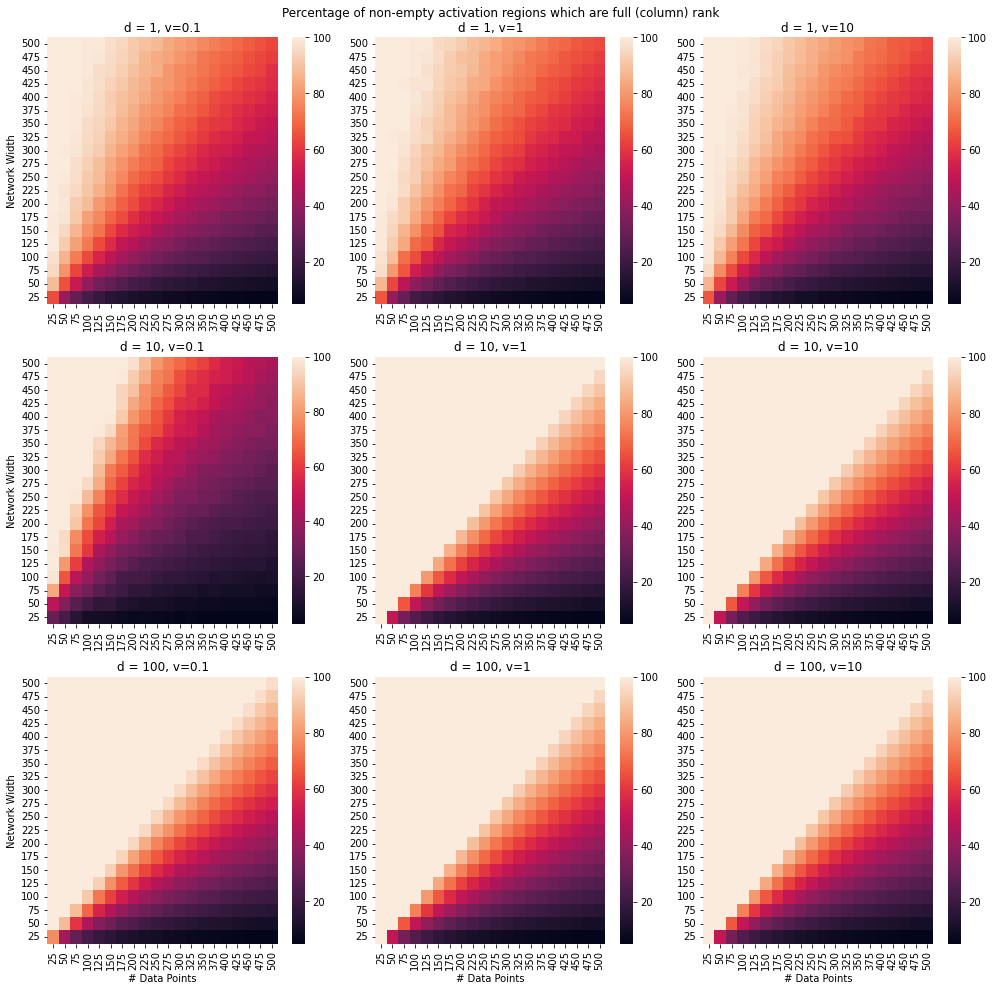

In [33]:
# Rank of activation regions
fig, ax = plt.subplots(len(D),len(V),figsize=(14, 14))
for r in range(len(D)):
    for c in range(len(V)):
        sns.heatmap(av_rank_A[r,c], ax=ax[r,c], xticklabels=N, yticklabels=M)
        ax[r,c].invert_yaxis()
        if r == len(V)-1:
            ax[r,c].set_xlabel("# Data Points")
        if c == 0:
            ax[r,c].set_ylabel("Network Width")
        ax[r,c].set_title("d = " + str(D[r])+ ", v=" + str(V[c]))
    
plt.suptitle("Percentage of non-empty activation regions which are full (column) rank")
plt.tight_layout()

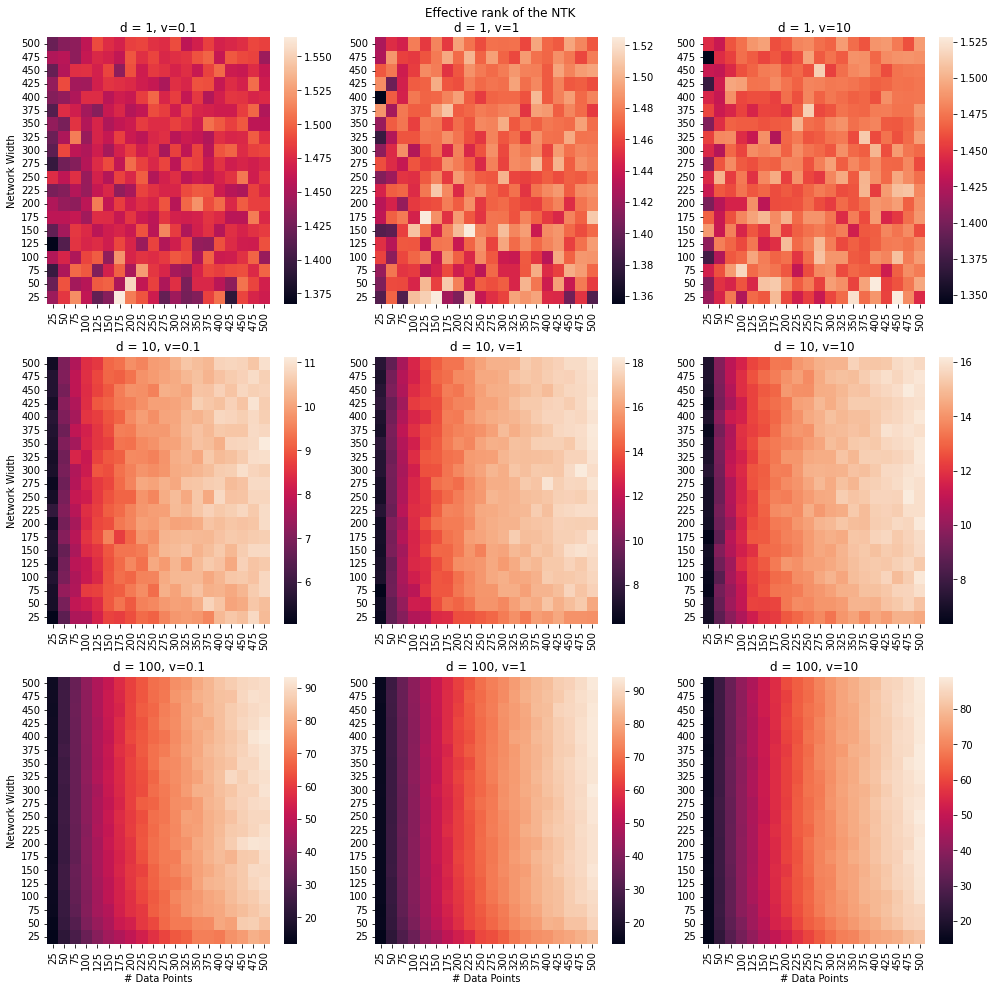

In [34]:
# Effective rank of corresponding NTK
fig, ax = plt.subplots(len(D),len(V),figsize=(14, 14))
for r in range(len(D)):
    for c in range(len(V)):
        sns.heatmap(av_eff_NTK[r,c], ax=ax[r,c], xticklabels=N, yticklabels=M)
        ax[r,c].invert_yaxis()
        if r == len(V)-1:
            ax[r,c].set_xlabel("# Data Points")
        if c == 0:
            ax[r,c].set_ylabel("Network Width")
        ax[r,c].set_title("d = " + str(D[r])+ ", v=" + str(V[c]))
    
plt.suptitle("Effective rank of the NTK")
plt.tight_layout()